In [29]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
df  = pd.read_csv('data/RealEstate.csv')

In [30]:
df

,MLS,Location,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Status
0,132842,Arroyo Grande,795000.0,3,3,2371,335.30,Short Sale
1,134364,Paso Robles,399000.0,4,3,2818,141.59,Short Sale
2,135141,Paso Robles,545000.0,4,3,3032,179.75,Short Sale
3,135712,Morro Bay,909000.0,4,4,3540,256.78,Short Sale
4,136282,Santa Maria-Orcutt,109900.0,3,1,1249,87.99,Short Sale
...,...,...,...,...,...,...,...,...
776,154562,Paso Robles,319900.0,3,3,1605,199.31,Regular
777,154565,Paso Robles,495000.0,3,2,1877,263.72,Regular
778,154566,San Luis Obispo,372000.0,3,2,1104,336.96,Foreclosure
779,154575,Arroyo Grande,589000.0,3,2,1975,298.23,Regular


In [85]:
df  = pd.read_csv('data/RealEstate.csv')
df = df.drop('Location',axis = 1) 
df2 = df.drop('Status', axis=1)
df_norm = (df2-df2.min())/(df2.max()-df2.min())
df = pd.concat((df_norm, df.Status), 1)
one_hot = pd.get_dummies(df['Status'])
# Drop column B as it is now encoded
df = df.drop('Status',axis = 1)
# Join the encoded df
df = df.join(one_hot)
X, y = df.drop('Price', axis=1).values, df['Price'].values

df

,MLS,Price,Bedrooms,Bathrooms,Size,Price/SQ.Ft,Foreclosure,Regular,Short Sale
0,0.000000,0.140429,0.3,0.2,0.336976,0.280785,0,0,1
1,0.070016,0.068068,0.4,0.2,0.403892,0.108646,0,0,1
2,0.105759,0.094746,0.4,0.2,0.435928,0.142556,0,0,1
3,0.132027,0.161261,0.4,0.3,0.511976,0.211009,0,0,1
4,0.158248,0.015240,0.3,0.0,0.169012,0.061014,0,0,1
...,...,...,...,...,...,...,...,...,...
776,0.999172,0.053614,0.3,0.2,0.222305,0.159938,0,1,0
777,0.999310,0.085610,0.3,0.1,0.263024,0.217176,0,1,0
778,0.999356,0.063134,0.3,0.1,0.147305,0.282260,1,0,0
779,0.999770,0.102787,0.3,0.1,0.277695,0.247843,0,1,0


In [86]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
X, y = df.drop('Price', axis=1).values, df['Price'].values
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X, y)

Ridge()

In [33]:
model.coef_

array([ 7.21834661e-01, -1.11368493e+04,  1.50762973e+04,  2.51783576e+02,
        1.83973469e+03, -5.71473251e+03,  2.05842222e+04, -1.48694897e+04])

In [34]:
alphas = np.logspace(-3, -1, 30)
scores = [cross_val_score(model(alpha), X, y, cv=3).mean()
        for alpha in alphas]
plt.plot(alphas, scores, label=model.__name__)

TypeError: 'Ridge' object is not callable

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s: %s' % (Model.__name__,
                      cross_val_score(model, X, y,cv=5,scoring='neg_mean_squared_error').mean()))

Ridge: -25653803084.242752
Lasso: -25566083729.07792


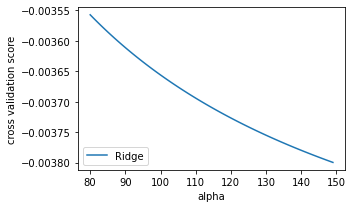

Wall time: 860 ms


In [87]:

%%time
import numpy as np
from matplotlib import pyplot as plt

alphas = list(range(80, 150))

plt.figure(figsize=(5, 3))

for Model in [Ridge]:
    scores = [cross_val_score(Model(alpha),  X, y, cv=5,scoring='neg_mean_squared_error').mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

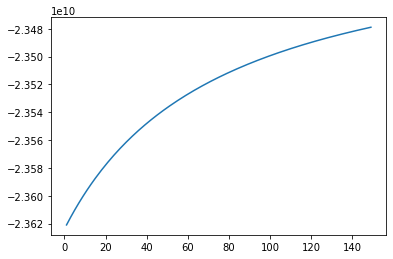

In [115]:
from sklearn.model_selection import KFold
df  = pd.read_csv('data/RealEstate.csv')
df = df.drop('Location',axis = 1) 
#df2 = df.drop('Status', axis=1)
#df_norm = (df2-df2.min())/(df2.max()-df2.min())
#df = pd.concat((df_norm, df.Status), 1)
one_hot = pd.get_dummies(df['Status'])
# Drop column B as it is now encoded
df = df.drop('Status',axis = 1)
# Join the encoded df
df = df.join(one_hot)
X, y = df.drop('Price', axis=1).values, df['Price'].values
alphas =  list(range(1, 150))
kf = KFold(n_splits=5, shuffle=True, random_state=123)
kf.get_n_splits(X)
scores = [cross_val_score(Ridge(alpha),  X, y, cv=kf,scoring='neg_mean_squared_error').mean()
        for alpha in alphas]
plt.plot(alphas, scores, label=Model.__name__)

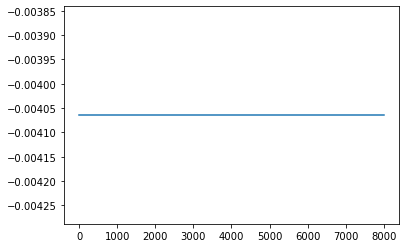

In [114]:
alphas =  np.linspace(1,8000, num=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=123)
kf.get_n_splits(X)
scores = [cross_val_score(Lasso(alpha),  X, y, cv=kf,scoring='neg_mean_squared_error').mean()
        for alpha in alphas]
plt.plot(alphas, scores, label=Model.__name__)

In [71]:
model = Ridge(alpha = 1)

kf = KFold(n_splits=5, shuffle=True, random_state=2)

kf.get_n_splits(X)
m = cross_val_score(model , X, y,cv = kf, scoring = 'neg_mean_squared_error' ).mean()

m

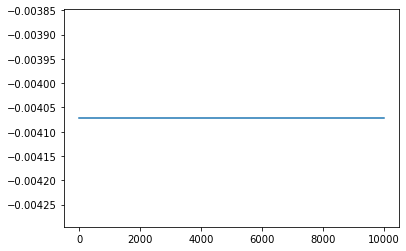

In [90]:
from sklearn.model_selection import KFold
alphas = np.linspace(1,10000, num=1000)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
kf.get_n_splits(X)
scores = [cross_val_score(Lasso(alpha),  X, y, cv=kf,scoring='neg_mean_squared_error').mean()
        for alpha in alphas]
plt.plot(alphas, scores, label=Model.__name__)

optimal parameter 17


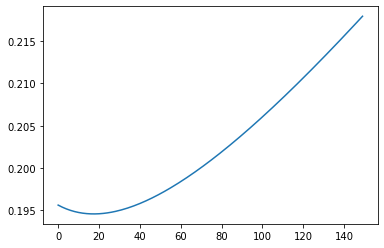

In [2]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
df  = pd.read_csv('data/RealEstate.csv')
df = df.drop('Location',axis = 1) 
one_hot = pd.get_dummies(df['Status'])
df = df.drop('Status',axis = 1)
names=df.columns
df = preprocessing.scale(df)
df = pd.DataFrame(df,columns=names).join(one_hot)
X, y = df.drop('Price', axis=1).values, df['Price'].values
seed=999
ran = np.linspace(1,150, num=150)
scorelist=[]
for alpha in ran:
    model = Ridge(alpha = alpha, random_state= seed)
    kf = KFold(n_splits=5, shuffle=True, random_state= seed)
    kf.get_n_splits(X)
    m = cross_val_score(model , X, y,cv = kf, scoring = 'neg_mean_squared_error' ).mean()
    scorelist.append(-m)
print("optimal parameter",np.argmin(scorelist))    
plt.plot(scorelist)

In [5]:
name=df.columns.values.tolist()
name.remove("Price")
name

['MLS',
 'Bedrooms',
 'Bathrooms',
 'Size',
 'Price/SQ.Ft',
 'Foreclosure',
 'Regular',
 'Short Sale']

In [6]:
model = Ridge(alpha = 17, random_state= seed)
kf = KFold(n_splits=5, shuffle=True, random_state= seed)
kf.get_n_splits(X)
model.fit(X, y)
coef=model.coef_.tolist()
name=df.columns.values.tolist()
name.remove("Price")
coef_set = pd.DataFrame({'name': name, 'coef': coef}, columns=['name', 'coef'])
coef_set

,name,coef
0,MLS,0.844626
1,Bedrooms,-10462.245996
2,Bathrooms,13777.895603
3,Size,252.500715
4,Price/SQ.Ft,1844.772393
5,Foreclosure,-4538.367586
6,Regular,17889.688371
7,Short Sale,-13351.320785


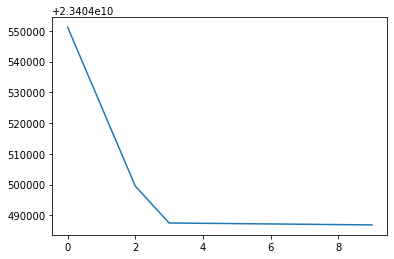

In [14]:

from sklearn.linear_model import Ridge, Lasso
df  = pd.read_csv('data/RealEstate.csv')
df = df.drop('Location',axis = 1) 
one_hot = pd.get_dummies(df['Status'])
df = df.drop('Status',axis = 1)
df = df.join(one_hot)
X, y = df.drop('Price', axis=1).values, df['Price'].values
ran = np.linspace(6900,6910, num=10)
scorelist=[]
for alpha in ran:
    model = Lasso(alpha = alpha, random_state= 123)
    kf = KFold(n_splits=5, shuffle=True, random_state= 123)
    kf.get_n_splits(X)
    m = cross_val_score(model , X, y,cv = kf, scoring = 'neg_mean_squared_error' ).mean()
    scorelist.append(-m)
plt.plot(scorelist)
print()

In [15]:
model = Lasso(alpha = 6903, random_state= seed)
kf = KFold(n_splits=5, shuffle=True, random_state= seed)
kf.get_n_splits(X)
model.fit(X, y)
coef=model.coef_.tolist()
name=df.columns.values.tolist()
name.remove("Price")
coef_set = pd.DataFrame({'name': name, 'coef': coef}, columns=['name', 'coef'])
coef_set

,name,coef
0,MLS,1.802586
1,Bedrooms,-0.000000
2,Bathrooms,0.000000
3,Size,257.603057
4,Price/SQ.Ft,1889.154283
5,Foreclosure,0.000000
6,Regular,0.000000
7,Short Sale,-0.000000


In [93]:
x1=1
x2=0.5
xtest=0.5
beta0=1
beta1=1
alpha1=2
alpha2=1
X=np.array([x1,x2]).T
beta=np.array([beta0,beta1]).T
W=np.array([[1/alpha1,0],[0,1/alpha2]])
Win=np.array([[alpha1,0],[0,alpha2]])
lamb=1
I=np.array([[1,0],[0,1]])
bias=lamb*X.T@((X.T@W@X+lamb*I)**-1)@beta
var=(((X.T@W@X+lamb*I)**-1)@X.T@W)@(Win)@(((X.T@W@X+lamb*I)**-1)@X.T@W).T
bias**2+var

11.551020408163264

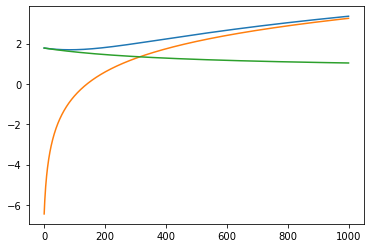

In [94]:

an=[]
biaslist=[]
varlist=[]
for lamb in np.linspace(0.01,2, num=1000):
    bias=lamb*X.T@((X.T@W@X+lamb*I)**-1)@beta
    var=(((X.T@W@X+lamb*I)**-1)@X.T@W)@(Win)@(((X.T@W@X+lamb*I)**-1)@X.T@W).T
    an.append(np.log(bias**2+var))
    biaslist.append(np.log(bias**2))
    varlist.append(np.log(var))
plt.plot(an)
plt.plot(biaslist)
plt.plot(varlist)

In [ ]:
1.9764705882352942

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
X, y = input_data.drop('Price', axis=1).values, input_data['Price'].values
model = Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X, y)
import pandas as pd 
import numpy as np  
import sklearn     
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics     
from sklearn import tree        
from sklearn.ensemble import RandomForestClassifier  
name=["word_freq_make", "word_freq_address", "word_freq_all ", "word_freq_3d"  , "word_freq_our ", "word_freq_over", "word_freq_remove " ," word_freq_internet" , "word_freq_order"   , "word_freq_mail", "word_freq_receive", "word_freq_will", "word_freq_people"  , "word_freq_report", "word_freq_addresses", "word_freq_free", "word_freq_business"  , "word_freq_email"   , "word_freq_you ", "word_freq_credit"  , "word_freq_your", "word_freq_font", "word_freq_000 ", "word_freq_money"   , "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab ", "word_freq_labs", "word_freq_telnet"  , "word_freq_857 ", "word_freq_data", "word_freq_415 ", "word_freq_85"  , "word_freq_technology"  , "word_freq_1999", "word_freq_parts"   , "word_freq_pm"  , "word_freq_direct"  , "word_freq_cs"  , "word_freq_meeting ", "word_freq_original"    , "word_freq_project ", "word_freq_re"  , "word_freq_edu", "word_freq_table"   , "word_freq_conference"  , "char_freq_;"   , "char_freq_("   , "char_freq_["   , "char_freq_!"   , "char_freq_$"   , "char_freq_#"   , "capital_run_length_average ", "capital_run_length_longest", "capital_run_length_total","spam"] 
df  = pd.read_csv('data/spambase.data', names=name)  
X = df[['word_freq_george','word_freq_650']]
y=df['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 
  
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)                            
clf = clf.fit(X_train,y_train)  
y_pred = clf.predict(X_test)    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))    
fig = plt.figure(figsize=(50,50))               _ = tree.plot_tree(clf,                            feature_names=X.columns,                        class_names="spams",                            filled=True) 
clf2 = RandomForestClassifier(max_depth=20, random_state=0)                             clf2 = clf2.fit(X_train,y_train)                y_pred2 = clf2.predict(X_test)  
print("Accuracy2:",metrics.accuracy_score(y_test, y_pred2))                                                 errlist=[]          for i in range(1,100):              clf2 = RandomForestClassifier(n_estimators=i, random_state=0)                           clf2 = clf2.fit(X_train,y_train)                y_pred2 = clf2.predict(X_test)                  errlist.append(metrics.accuracy_score(y_test, y_pred2))                             plt.plot(errlist)                                                                                                       import pandas as pd 
import numpy as np  
import sklearn      import matplotlib.pyplot as plt 
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import Ridge, Lasso   from sklearn.linear_model import RidgeCV        from sklearn.model_selection import RepeatedKFold    from sklearn import preprocessing               from sklearn.model_selection import KFold       df  = pd.read_csv('data/RealEstate.csv')        one_hot = pd.get_dummies(df['Status'])          df = df.drop('Location',axis = 1)               df = df.drop('Status',axis = 1) 
name=df.columns     df = preprocessing.scale(df)    df = pd.DataFrame(df,columns=name).join(one_hot)     df                  kf=sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=1)              X, y = df.drop('Price', axis=1).values, df['Price'].values                              for Model in [Ridge, Lasso]:        model = Model() 
    print('%s: %s' % (Model.__name__,                                 cross_val_score(model, X, y,scoring = 'neg_mean_squared_error').mean())) 
                    alphas = myList = np.linspace(1,150,1000)                           plt.figure(figsize=(5, 3))      for Model in [Ridge]:               scores = [cross_val_score(Model(alpha), X, y, cv=kf ).mean()                                    for alpha in alphas]                    plt.plot(alphas, scores, label=Model.__name__)                       plt.legend(loc='lower left')    plt.xlabel('alpha') 
plt.ylabel('cross validation score')            plt.tight_layout()  
plt.show()                                                                                          df  = pd.read_csv('data/RealEstate.csv')        one_hot = pd.get_dummies(df['Status'])          df = df.drop('Location',axis = 1)               df = df.drop('Status',axis = 1) 
name=df.columns     #df = preprocessing.scale(df)   #df = pd.DataFrame(df,columns=name).join(one_hot)    df=df.join(one_hot) 
alphas = myList = np.linspace(6000,8000,2000)   X, y = df.drop('Price', axis=1).values, df['Price'].values                              for Model in [Ridge, Lasso]:        model = Model() 
    print('%s: %s' % (Model.__name__,                                 cross_val_score(model, X, y).mean()))                               plt.figure(figsize=(5, 3))      kf=sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state=123)  
          for Model in [Lasso]:               scores = [cross_val_score(Model(alpha), X, y, cv=kf,scoring = 'neg_mean_squared_error' ).mean() 
            for alpha in alphas]                    plt.plot(alphas, scores, label=Model.__name__)                       plt.legend(loc='lower left')    plt.xlabel('alpha') 
plt.ylabel('cross validation score')            plt.tight_layout()  
plt.show()"                                                                                                                                                                                  